# shap

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import joblib
import shap
import lightgbm as lgb
import matplotlib.pyplot as plt

In [3]:
# 모델 로드
loaded_model = joblib.load("/Users/han-yeeun/mid-project/src/storage/trained_model/model_lgb_lowest_0.0.2.pkl")

In [4]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import joblib

from data_preprocessing import pipeline
from feature_preprocessing import pipeline2

In [5]:
# 전처리된 데이터 가져오기
df = pd.read_csv("/Users/han-yeeun/mid-project/src/storage/train_data/train-시세차익있는최종트레인.csv", encoding = 'cp949')

X = df.drop(columns=["최저당첨가점"])
Y = df["최저당첨가점"]

X_train, X_test, y_train, y_test = train_test_split(
    X,  # 타겟(최저당첨가점) 제외
    Y,  # 타겟
    test_size=0.2,
    random_state=42
)

feature_pipeline = pipeline2()

# 학습 데이터(X_train)에 fit
feature_pipeline.fit(X_train)

# 학습 데이터(X_train)를 변환
X_train_transformed = feature_pipeline.transform(X_train)

# 테스트 데이터(X_test)를 변환
X_test_transformed = feature_pipeline.transform(X_test)

Index(['공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구', '공급세대수', '접수건수',
       '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '법정동코드',
       '시세차익'],
      dtype='object')
Index(['공급규모', '공급세대수', '접수건수', '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5',
       '토픽 6', '토픽 7', '법정동코드', '시세차익', '투기과열지구_N', '투기과열지구_Y', '조정대상지역_N',
       '조정대상지역_Y', '분양가상한제_N', '분양가상한제_Y', '정비사업_N', '정비사업_Y', '공공주택지구_N',
       '공공주택지구_Y'],
      dtype='object')
⚠️ Warning: 새로운 법정동코드 발견 {'1156011000.0', '4139012700.0', '4111514000.0', '4143011000.0', '4137012200.0', '4125010300.0', '4148025327.0'}. 'unknown'으로 대체합니다.
Index(['공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구', '공급세대수', '접수건수',
       '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '법정동코드',
       '시세차익'],
      dtype='object')
Index(['공급규모', '공급세대수', '접수건수', '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5',
       '토픽 6', '토픽 7', '법정동코드', '시세차익', '투기과열지구_N', '투기과열지구_Y', '조정대상지역_N',
       '조정대상지역_Y', '분

/opt/anaconda3/envs/Yeeun_Han/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/Yeeun_Han/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


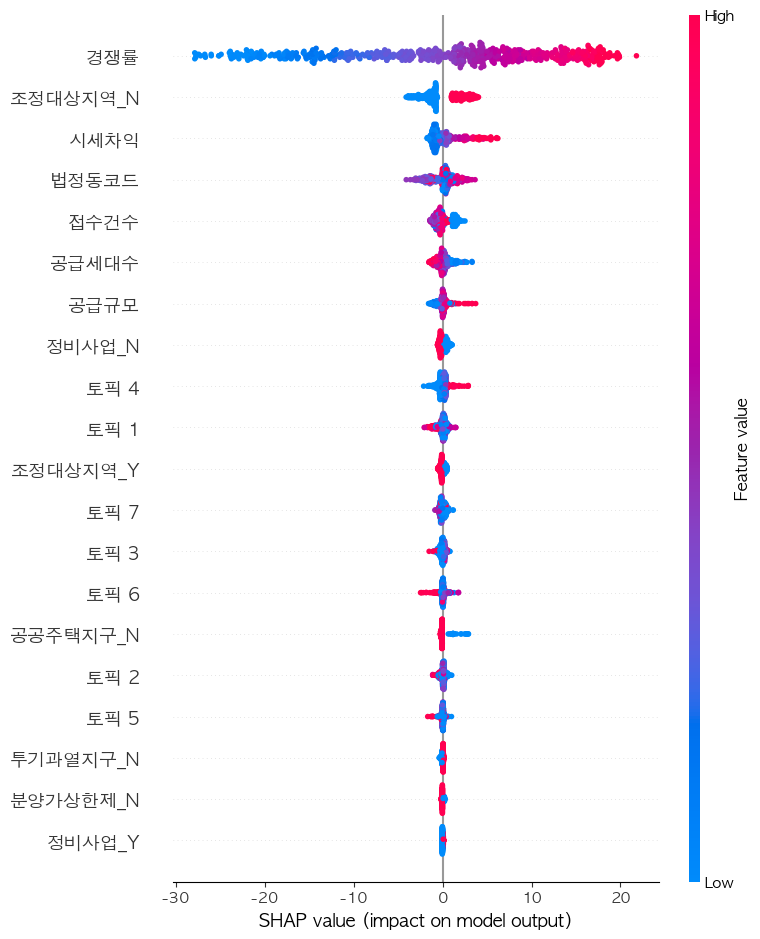

In [6]:
# SHAP 값 계산 (모델에 대해 SHAP 값을 계산)
explainer = shap.Explainer(loaded_model)
shap_values = explainer(X_test_transformed)

# SHAP 값 시각화 (Summary Plot)
shap.summary_plot(shap_values, X_test_transformed)

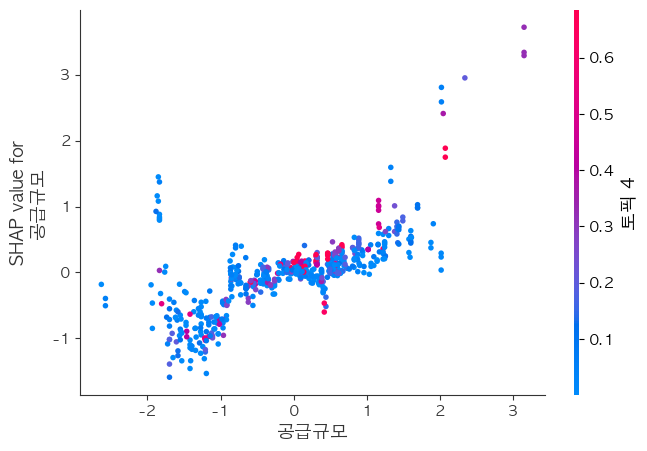

=== SHAP Values ===
[[ 0.11599458 -0.70049767  1.55045569 ... -0.05626906 -0.15171869
  -0.01770451]
 [ 0.68301854 -1.03738001  2.30246448 ... -0.02086672 -0.06024565
  -0.00570749]
 [ 3.72002053 -0.48505397 -0.42391788 ...  0.07786697 -0.07992105
  -0.00606983]
 ...
 [ 0.17459432  1.45035032 -0.24782091 ...  0.05517446 -0.0823289
  -0.00580802]
 [-0.93051712  1.67499237  0.15402529 ... -0.00996274 -0.06085218
  -0.00613165]
 [ 0.14543647  0.28929384 -0.19590589 ...  0.05402181 -0.15525605
  -0.01022419]]


In [7]:
# SHAP 값 시각화 (Dependence Plot)
# 특정 feature 이름이나 인덱스 지정 필요
# 예제: 첫 번째 feature에 대한 의존도 플롯 시각화
shap.dependence_plot(0, shap_values.values, X_test_transformed) 

# SHAP 값 요약 출력
print("=== SHAP Values ===")
print(shap_values.values)

In [8]:
# SHAP 값 평균 계산
shap_mean = pd.DataFrame(shap_values.values, columns=X_test_transformed.columns).mean().sort_values(ascending=False)
print(shap_mean)

시세차익        0.157796
법정동코드       0.077120
공급세대수       0.054262
경쟁률         0.049604
토픽 2        0.021728
접수건수        0.019479
토픽 7        0.015735
토픽 4        0.011659
토픽 6        0.008293
조정대상지역_N    0.008279
정비사업_N      0.005547
공공주택지구_N    0.003946
조정대상지역_Y    0.000981
공공주택지구_Y    0.000805
분양가상한제_Y   -0.001325
정비사업_Y     -0.001426
투기과열지구_Y   -0.002183
분양가상한제_N   -0.003750
토픽 1       -0.004054
토픽 5       -0.011367
투기과열지구_N   -0.012175
토픽 3       -0.018113
공급규모       -0.022285
dtype: float64


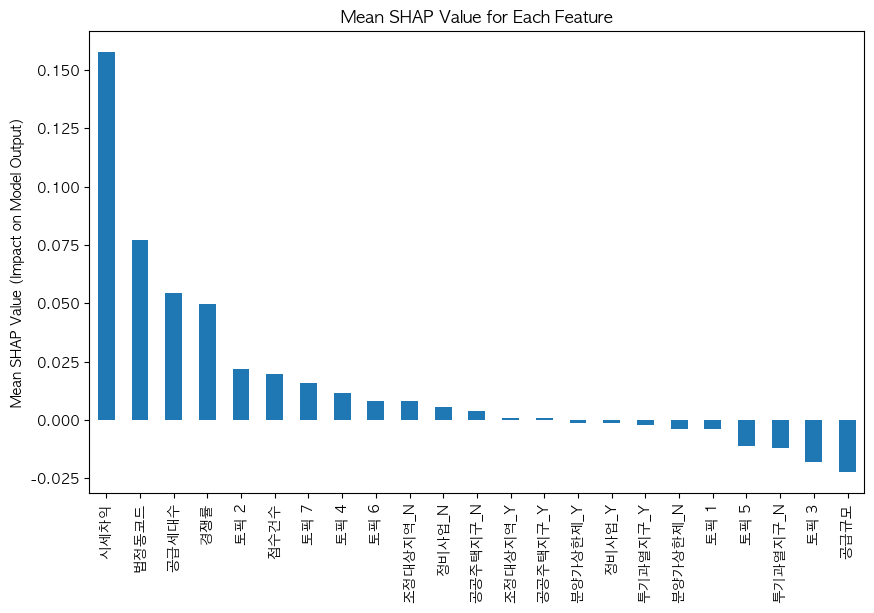

In [9]:
import matplotlib.pyplot as plt

# SHAP 평균값 바 차트 시각화
plt.figure(figsize=(10, 6))
shap_mean.plot(kind='bar')
plt.title('Mean SHAP Value for Each Feature')
plt.ylabel('Mean SHAP Value (Impact on Model Output)')
plt.show()

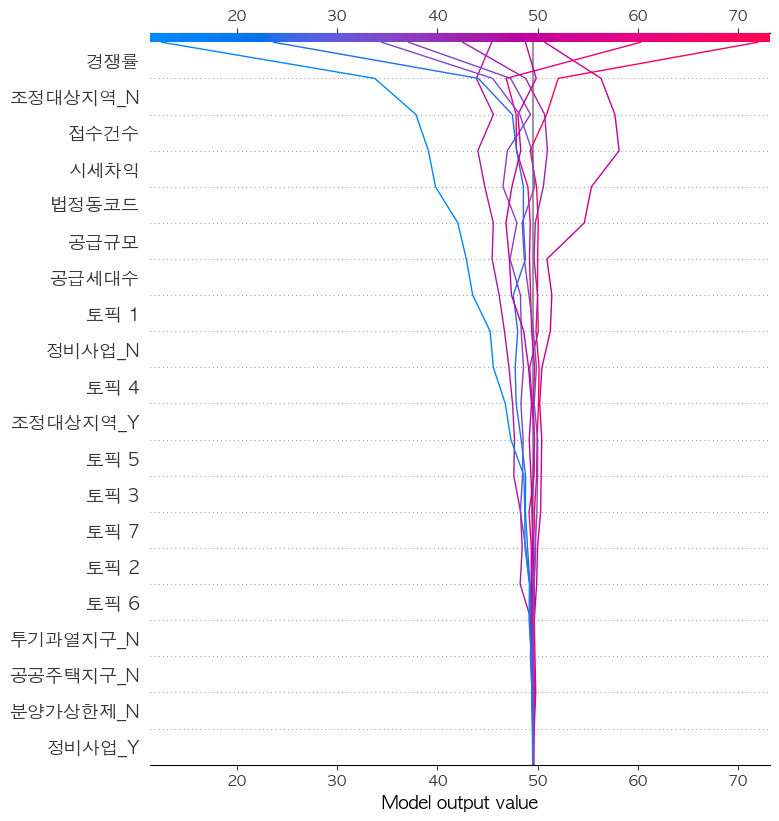

In [10]:
# decision plot - 결정 경로 시각화
shap.decision_plot(explainer.expected_value, shap_values.values[:10], X_test_transformed.iloc[:10])

In [11]:
# force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[3, :], X_test_transformed.iloc[3, :])

/opt/anaconda3/envs/Yeeun_Han/lib/python3.11/site-packages/shap/plots/_waterfall.py:279: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  text_bbox = txt_obj.get_window_extent(renderer=renderer)
/opt/anaconda3/envs/Yeeun_Han/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


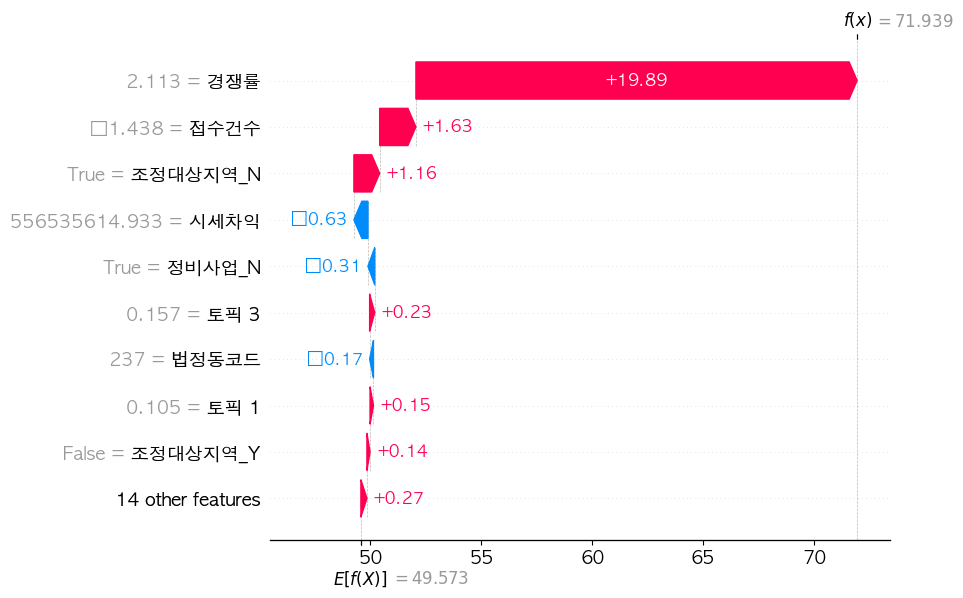

In [12]:
# 특정 샘플에 대한 Waterfall Chart - 개별 샘플에 대한 예측 과정 시각화
sample_idx = 3  # 첫 번째 샘플에 대해 시각화
shap.plots.waterfall(shap_values[sample_idx])

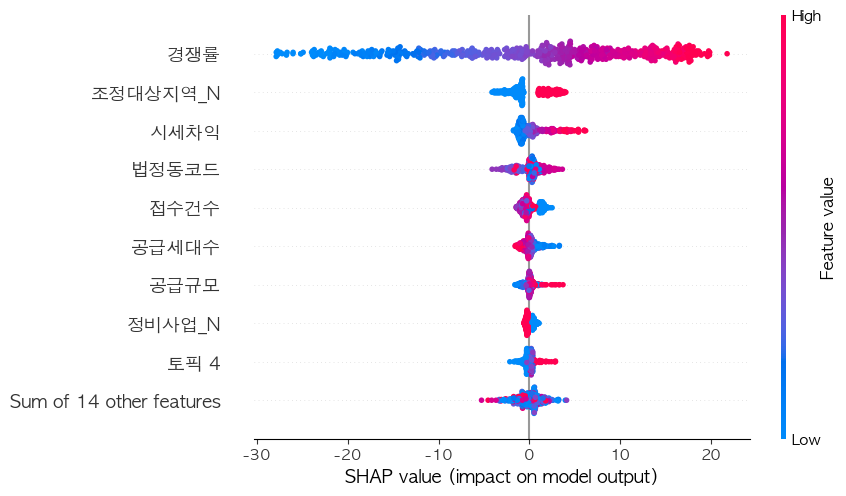

In [13]:
# Beeswarm Plot - 요약 및 분포 시각화
shap.plots.beeswarm(shap_values)